# Лабораторная №3
__Цель лабораторной работы:__ изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

#### Задание:

1. Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    1. масштабирование признаков (не менее чем тремя способами);
    1. обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
    1. обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
    1. отбор признаков:
        - один метод из группы методов фильтрации (filter methods);
        - один метод из группы методов обертывания (wrapper methods);
        - один метод из группы методов вложений (embedded methods).

# Описание данных
* Date - Дата наблюдений
* Location - Название локации, в которой расположена метеорологическая станция
* MinTemp - Минимальная температура в градусах цельсия
* MaxTemp - Максимальная температура в градусах цельсия
* Rainfall - Количество осадков, зафиксированных за день в мм
* Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
* Sunshine - Число солнечных часов за день
* WindGustDir - направление самого сильного порыва ветра за последние 24 часа
* WindGustSpeed -  скорость (км / ч) самого сильного порыва ветра за последние 24 часа
* WindDir9am - направление ветра в 9 утра

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])

In [3]:
total_count = data.shape[0]
num_cols = []
cat_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
    elif dt=='object':
        cat_cols.append(col)

In [4]:
data = data.drop(['Evaporation'], axis = 1)
num_cols.remove('Evaporation')

data['Sunshine'] = data['Sunshine'].fillna(data.median(numeric_only=True))
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mode())
data = data.fillna(data.mode())

In [5]:
data[:] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data)

In [6]:
data['RainToday'] = data['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)
cat_cols.remove('RainToday')
cat_cols.remove('RainTomorrow')

In [7]:
data = data.drop(['RISK_MM'], axis = 1)

In [87]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# for col in cat_cols:
#     data[col] = le.fit_transform(data[col])

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])

In [9]:
categorical = ['WindDir3pm','WindDir9am', 'WindGustDir']

data = pd.concat([data, pd.get_dummies(data[categorical], columns=categorical, drop_first=True)],axis=1)
data.drop(categorical, axis=1, inplace=True)

## Нестандартный признак

Преобразуем дату

In [10]:
import datetime as dt

data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(dt.datetime.toordinal)

## Масштабирование данных

In [11]:
def arr_to_df(arr_scaled, columns):
    res = pd.DataFrame(arr_scaled, columns=columns)
    return res

### MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_minmax = arr_to_df( min_max_scaler.fit_transform(data), data.columns )
data_minmax.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.561300,0.494597,0.487614,0.529669,0.006272,0.275058,0.260925,0.107343,0.213026,0.692200,...,0.046142,0.056283,0.062936,0.065467,0.063245,0.060552,0.061867,0.134395,0.056726,0.062598
std,0.261701,0.296615,0.150737,0.134427,0.022713,0.323356,0.102294,0.068187,0.100627,0.192257,...,0.209792,0.230468,0.242848,0.247350,0.243404,0.238507,0.240914,0.341077,0.231319,0.242239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329739,0.229167,0.379717,0.429112,0.000000,0.000000,0.193798,0.053846,0.149425,0.570000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.577185,0.500000,0.483491,0.517958,0.000000,0.013793,0.240310,0.100000,0.195402,0.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.788876,0.750000,0.596698,0.623819,0.001617,0.600000,0.310078,0.146154,0.275862,0.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


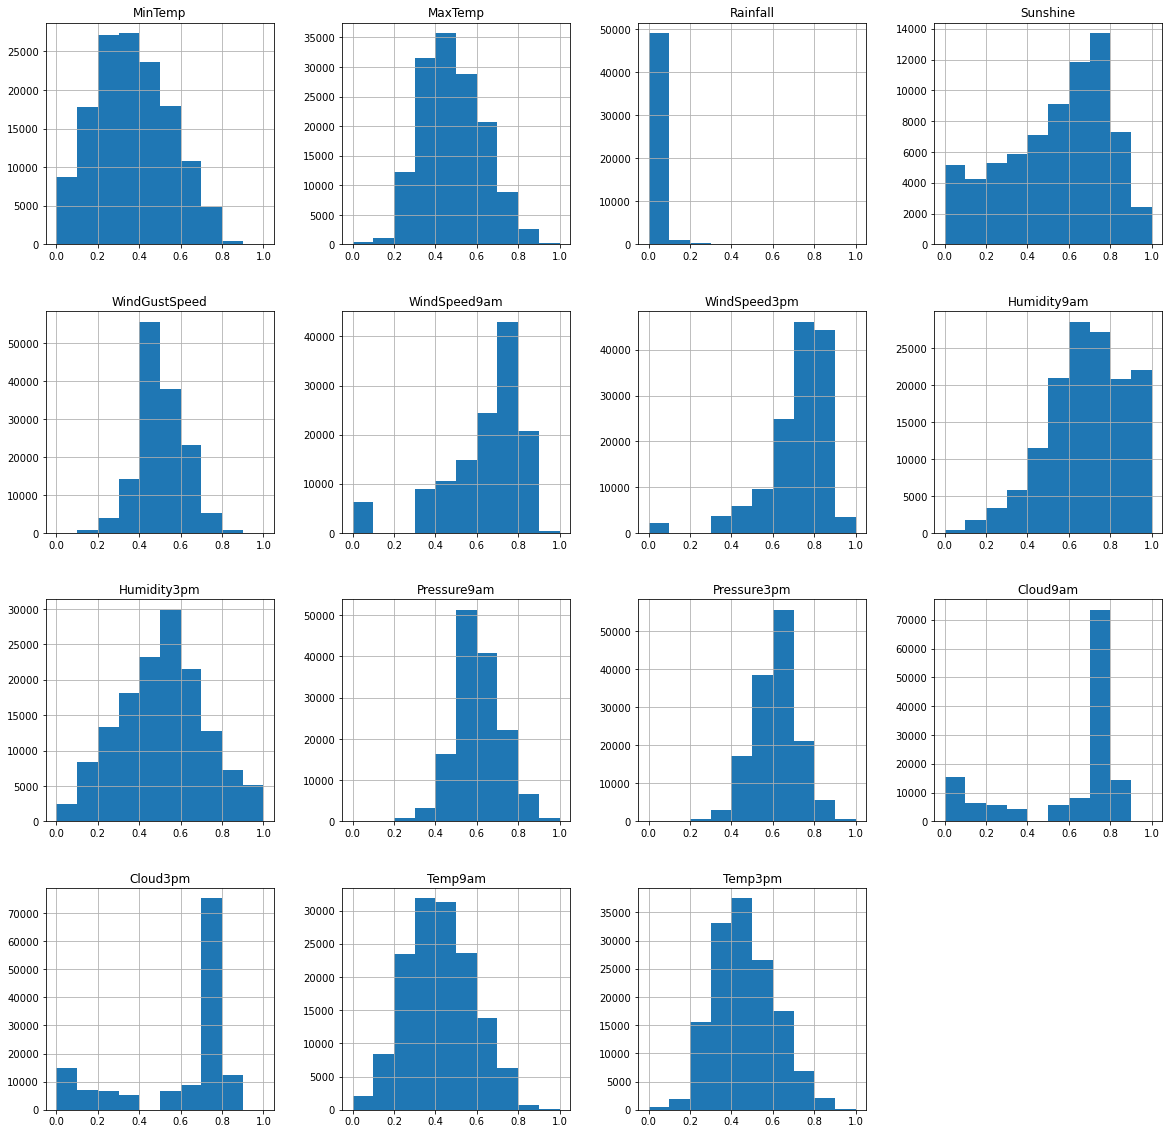

In [29]:
data_minmax[num_cols].hist(figsize=(20,20))
plt.show()

In [ ]:
# draw_kde(['Sunshine', 'WindGustSpeed', 'Pressure9am'], data, data_minmax, 'обучающая', 'тестовая')

### StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

cs11 = StandardScaler()
data_stscal = arr_to_df( cs11.fit_transform(data), data.columns )
data_stscal.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
count,1.421930e+05,1.421930e+05,1.386310e+05,1.420740e+05,5.051200e+04,7.206900e+04,1.421930e+05,1.290370e+05,1.400850e+05,1.421920e+05,...,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,-4.568480e-14,-2.375395e-14,-1.336574e-15,2.392474e-15,-2.656044e-15,4.377702e-15,-3.502465e-14,-9.523038e-15,-2.349945e-14,6.442510e-15,...,-4.877081e-14,-4.700070e-15,3.792482e-14,6.031890e-15,3.959005e-14,6.386993e-15,3.722020e-14,-1.571981e-13,-1.142116e-14,3.108642e-14
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000010e+00,1.000007e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.144822e+00,-1.667479e+00,-2.053193e+00,-3.268740e+00,-4.914842e-01,-2.168449e+00,-4.573230e+00,-3.210179e+00,-4.840631e+00,-3.548564e+00,...,-2.199399e-01,-2.442116e-01,-2.591573e-01,-2.646764e-01,-2.598365e-01,-2.538785e-01,-2.568005e-01,-3.940318e-01,-2.452285e-01,-2.584148e-01
25%,-8.848332e-01,-8.948690e-01,-7.487198e-01,-7.401830e-01,-4.686239e-01,-7.170551e-01,-6.062049e-01,-3.813041e-01,-2.485033e-01,-6.356637e-01,...,-2.199399e-01,-2.442116e-01,-2.591573e-01,-2.646764e-01,-2.598365e-01,-2.538785e-01,-2.568005e-01,-3.940318e-01,-2.452285e-01,-2.584148e-01
50%,6.070062e-02,1.821567e-02,-5.520230e-02,-9.038626e-02,-3.467024e-01,2.040219e-01,-8.375331e-02,1.958465e-01,3.442135e-01,4.054519e-02,...,-2.199399e-01,-2.442116e-01,-2.591573e-01,-2.646764e-01,-2.598365e-01,-2.538785e-01,-2.568005e-01,-3.940318e-01,-2.452285e-01,-2.584148e-01
75%,8.696092e-01,8.610630e-01,7.373891e-01,7.006706e-01,3.430218e-02,7.901618e-01,5.882498e-01,6.864940e-01,6.404108e-01,7.687702e-01,...,-2.199399e-01,-2.442116e-01,-2.591573e-01,-2.646764e-01,-2.598365e-01,-2.538785e-01,-2.568005e-01,-3.940318e-01,-2.452285e-01,-2.584148e-01
max,1.676349e+00,1.703910e+00,3.527971e+00,3.511748e+00,2.777144e+01,1.850796e+00,4.435776e+00,1.864534e+00,1.758688e+00,1.601027e+00,...,4.546698e+00,4.094809e+00,3.858661e+00,3.778199e+00,3.848574e+00,3.938892e+00,3.894073e+00,2.537866e+00,4.077829e+00,3.869748e+00


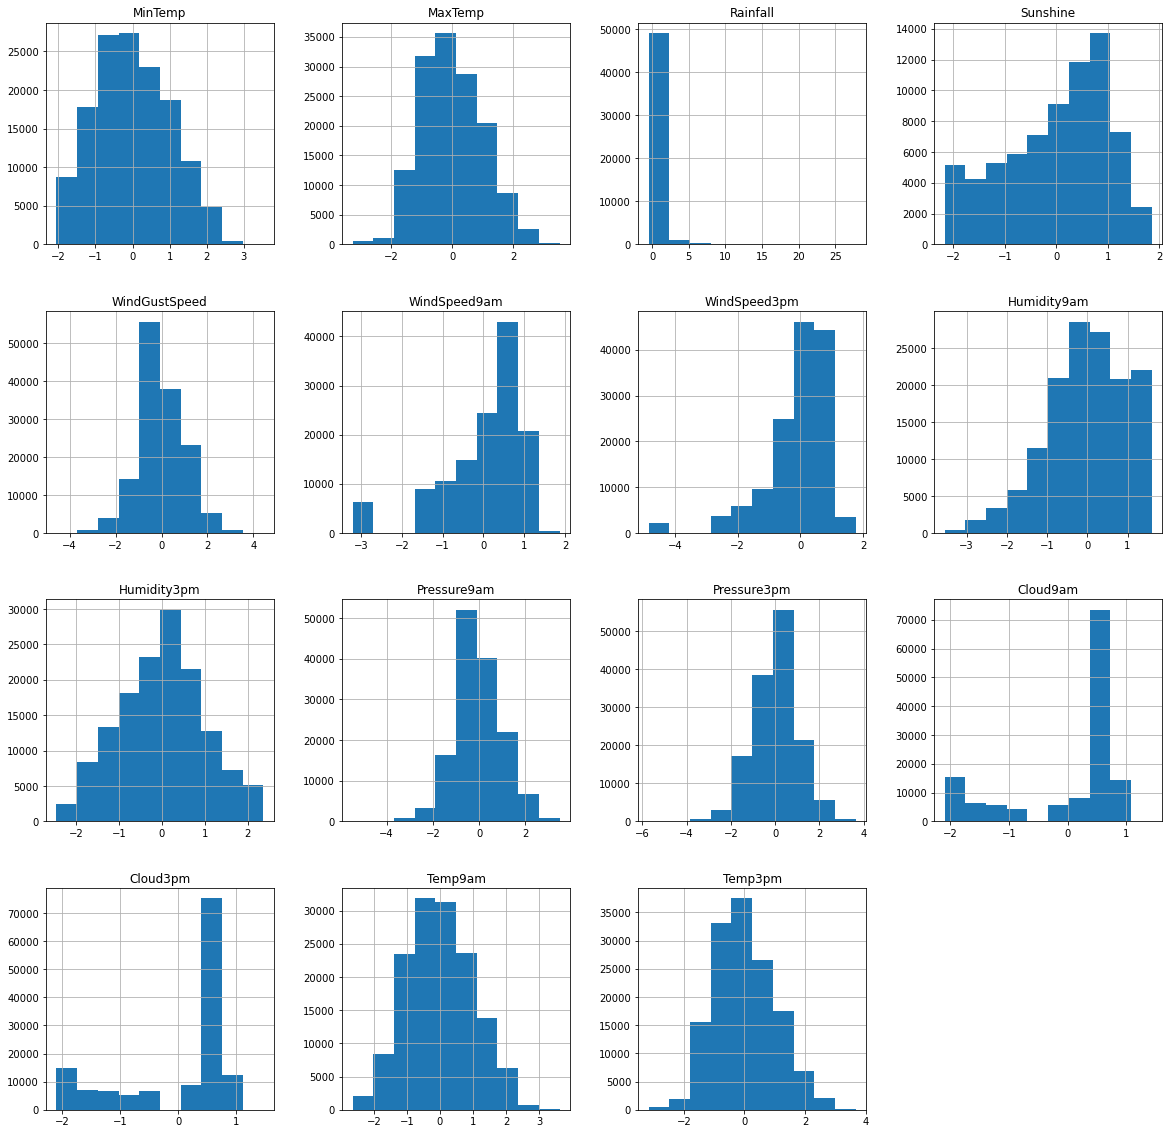

In [32]:
data_stscal[num_cols].hist(figsize=(20,20))
plt.show()

### MeanNormalisation

In [30]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = param_df.mean(axis=0)
        maxs = param_df.max(axis=0)
        mins = param_df.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [33]:
sc21 = MeanNormalisation()
data_meann = sc21.fit_transform(data)
data_meann.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
count,1.421930e+05,1.421930e+05,1.386310e+05,1.420740e+05,5.051200e+04,7.206900e+04,1.421930e+05,1.290370e+05,1.400850e+05,1.421920e+05,...,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,-1.208120e-14,1.560273e-15,2.332991e-15,-1.451398e-17,-2.861866e-15,3.269599e-15,3.085900e-13,2.661581e-14,-7.969160e-15,5.170696e-16,...,1.194564e-14,-4.687252e-15,1.109732e-14,-2.955912e-15,-6.655636e-16,-6.216279e-15,-8.795634e-15,-1.982616e-14,-2.724218e-15,-9.036343e-15
std,2.617008e-01,2.966147e-01,1.791747e-01,1.474825e-01,3.538240e-02,2.488047e-01,1.110004e-01,1.970563e-01,1.515313e-01,1.941909e-01,...,2.097922e-01,2.304676e-01,2.428479e-01,2.473496e-01,2.434040e-01,2.385066e-01,2.409140e-01,3.410772e-01,2.313186e-01,2.422394e-01
min,-5.612997e-01,-4.945970e-01,-3.678790e-01,-4.820803e-01,-1.738972e-02,-5.395165e-01,-5.076287e-01,-6.325833e-01,-7.335047e-01,-6.890962e-01,...,-4.614151e-02,-5.628266e-02,-6.293559e-02,-6.546736e-02,-6.324503e-02,-6.055150e-02,-6.186662e-02,-1.343948e-01,-5.672572e-02,-6.259802e-02
25%,-2.315607e-01,-2.654303e-01,-1.341512e-01,-1.091637e-01,-1.658087e-02,-1.784054e-01,-6.728876e-02,-7.513807e-02,-3.765590e-02,-1.234397e-01,...,-4.614151e-02,-5.628266e-02,-6.293559e-02,-6.546736e-02,-6.324503e-02,-6.055150e-02,-6.186662e-02,-1.343948e-01,-5.672572e-02,-6.259802e-02
50%,1.588535e-02,5.403014e-03,-9.890822e-03,-1.333035e-02,-1.226704e-02,5.076125e-02,-9.296620e-03,3.859262e-02,5.215895e-02,7.873477e-03,...,-4.614151e-02,-5.628266e-02,-6.293559e-02,-6.546736e-02,-6.324503e-02,-6.055150e-02,-6.186662e-02,-1.343948e-01,-5.672572e-02,-6.259802e-02
75%,2.275766e-01,2.554030e-01,1.321210e-01,1.033363e-01,1.213681e-03,1.965946e-01,6.529575e-02,1.352774e-01,9.704196e-02,1.492876e-01,...,-4.614151e-02,-5.628266e-02,-6.293559e-02,-6.546736e-02,-6.324503e-02,-6.055150e-02,-6.186662e-02,-1.343948e-01,-5.672572e-02,-6.259802e-02
max,4.387003e-01,5.054030e-01,6.321210e-01,5.179197e-01,9.826103e-01,4.604835e-01,4.923713e-01,3.674167e-01,2.664953e-01,3.109038e-01,...,9.538585e-01,9.437173e-01,9.370644e-01,9.345326e-01,9.367550e-01,9.394485e-01,9.381334e-01,8.656052e-01,9.432743e-01,9.374020e-01


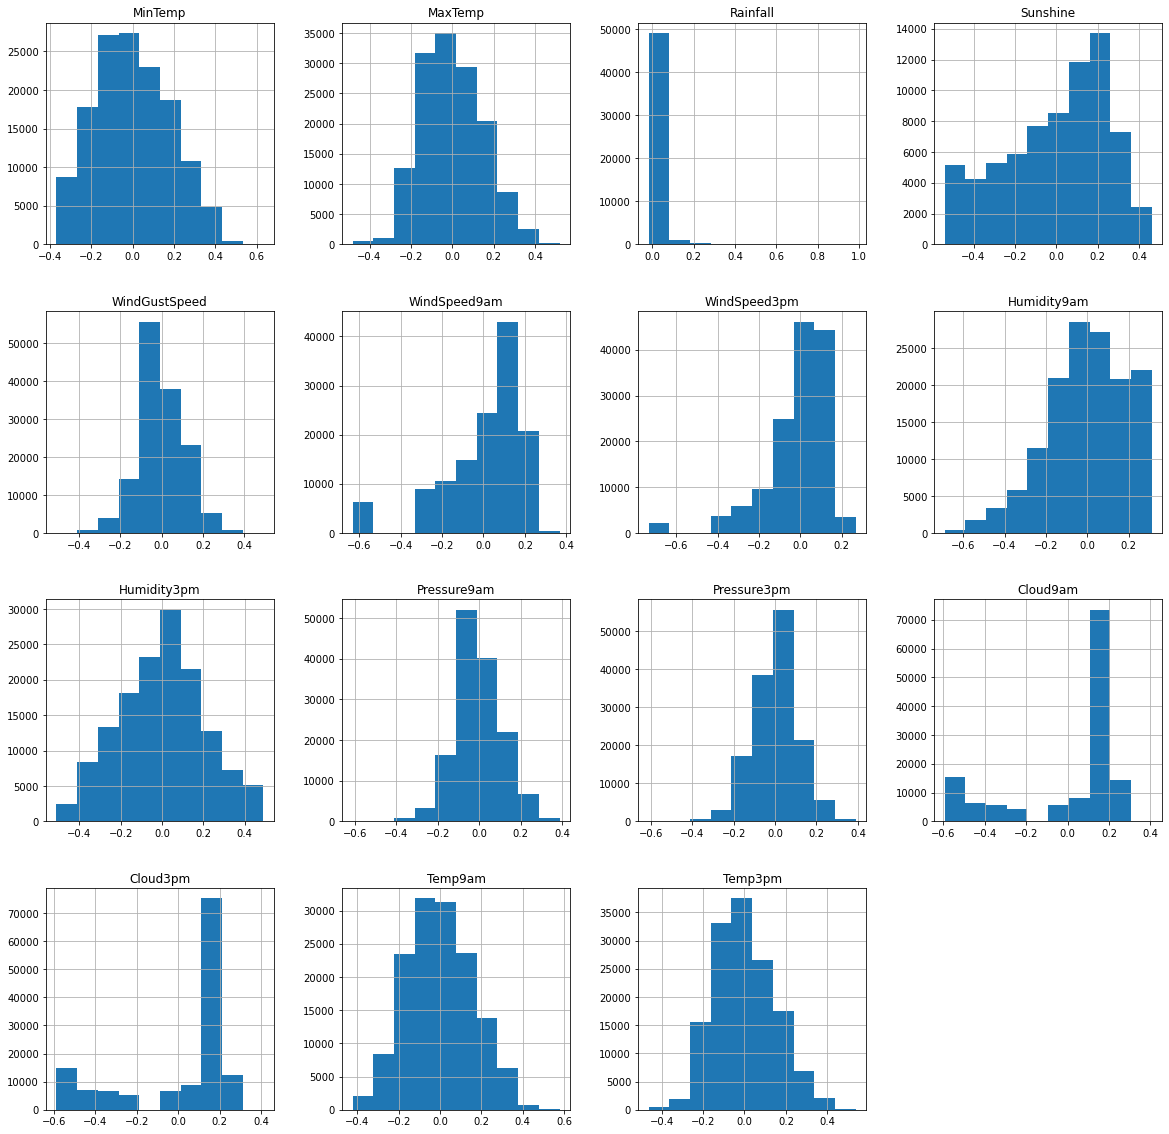

In [35]:
data_meann[num_cols].hist(figsize=(20,20))
plt.show()

In [13]:
data = data_minmax

## Обработка выбросов для числовых признаков

In [86]:
def diagnostic_plots_out(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [62]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [63]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

In [60]:
col_list = ['MinTemp', 'Humidity9am', 'Pressure9am']

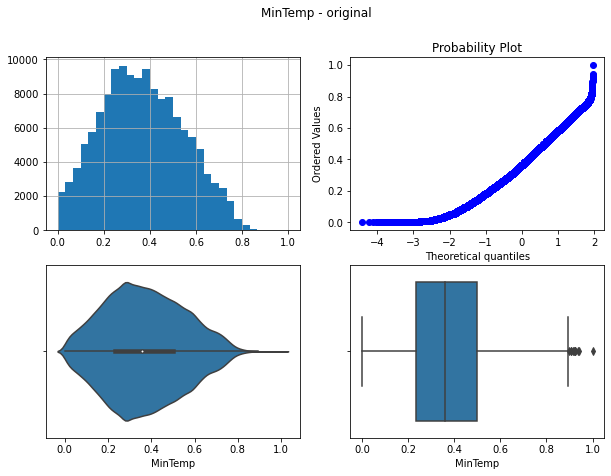

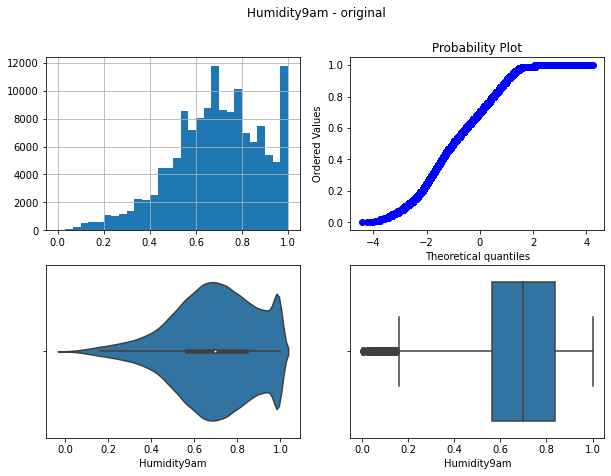

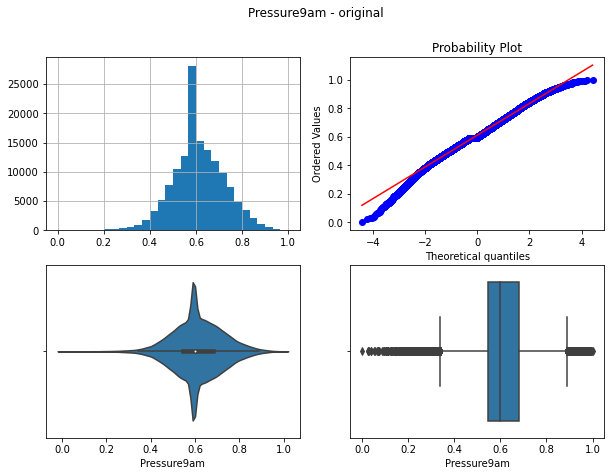

In [90]:
for col in col_list:
    diagnostic_plots_out(data, col, col + ' - original') 

### Удаление выбросов

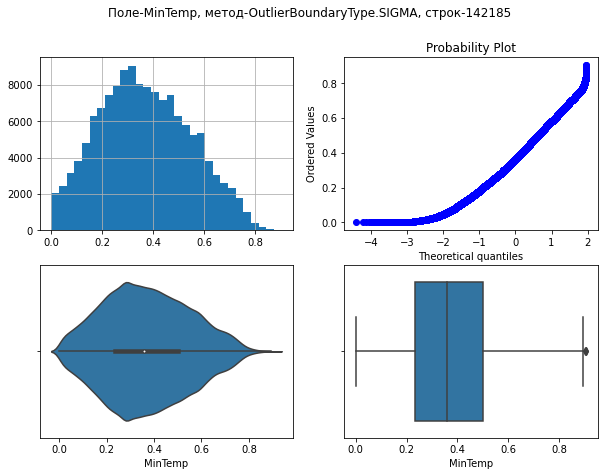

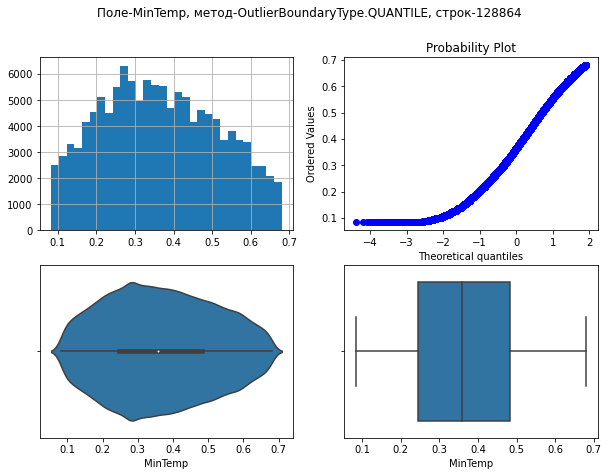

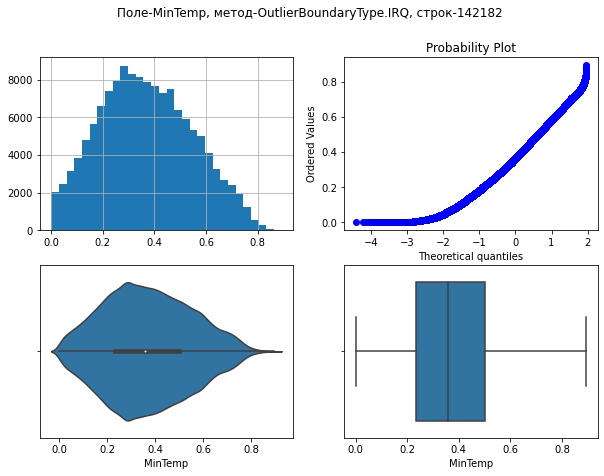

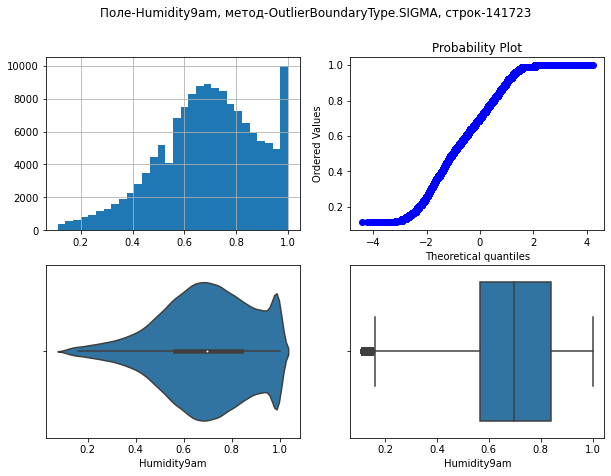

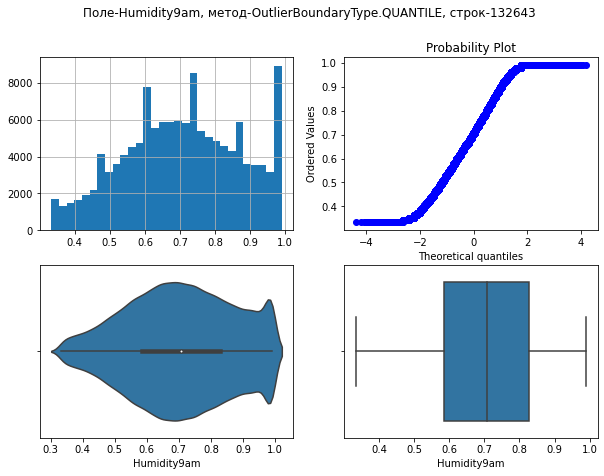

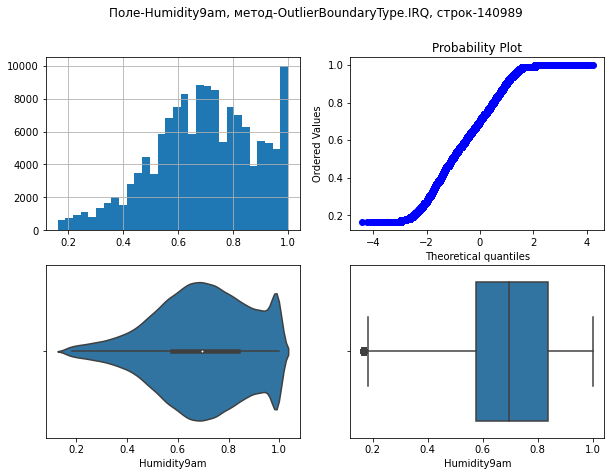

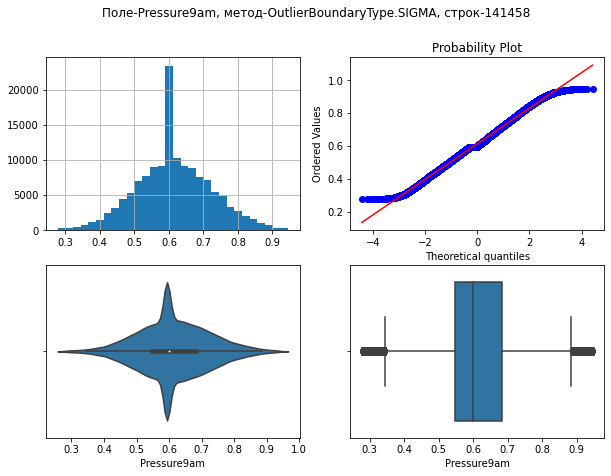

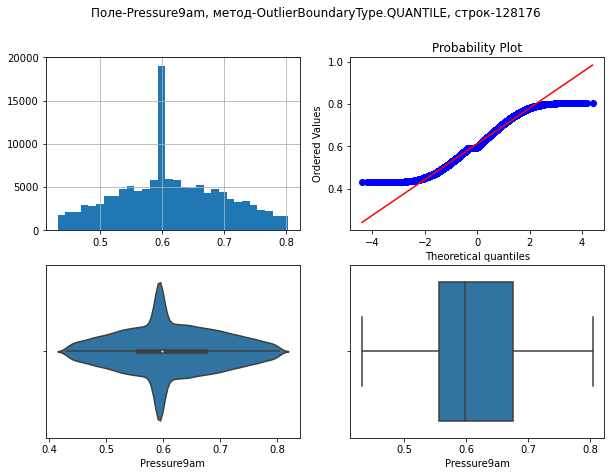

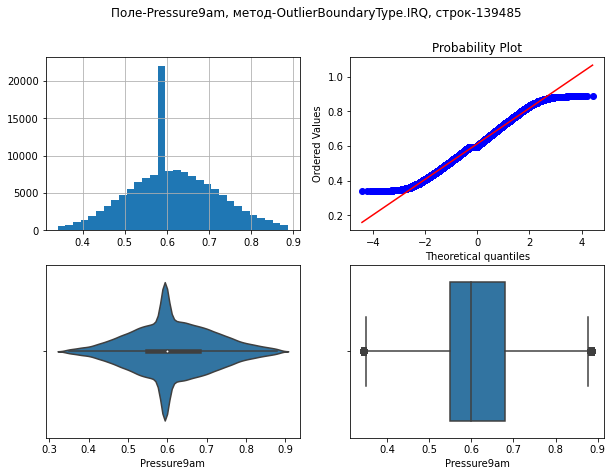

In [55]:
for col in col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots_out(data_trimmed, col, title)

MinTemp - IRQ
Humidity9am - IRQ
Pressure9am

### Замена выбросов

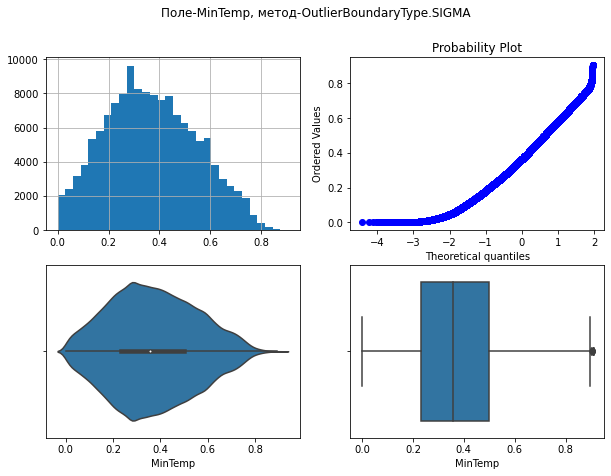

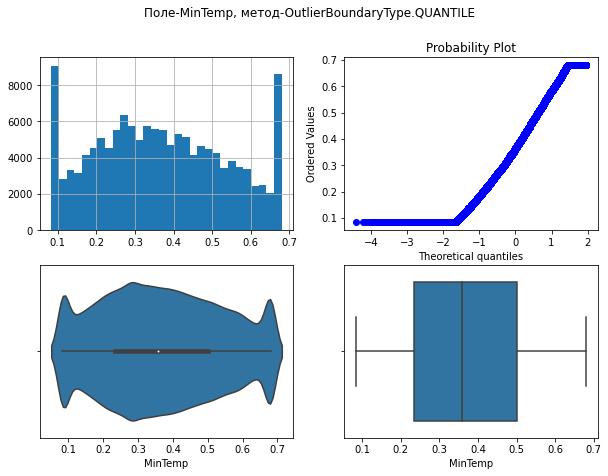

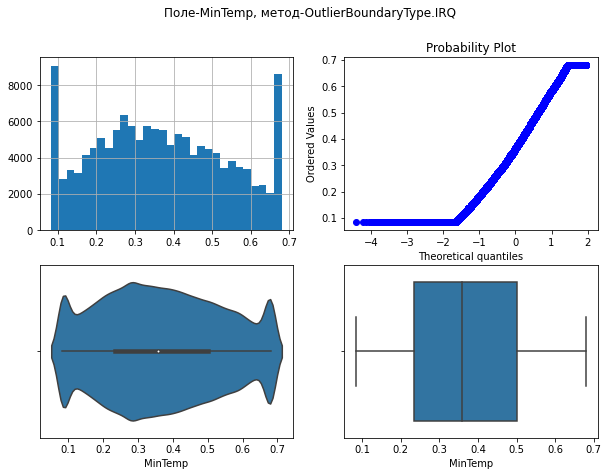

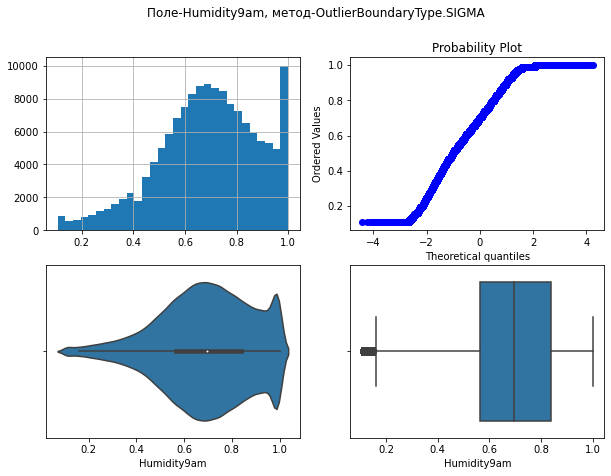

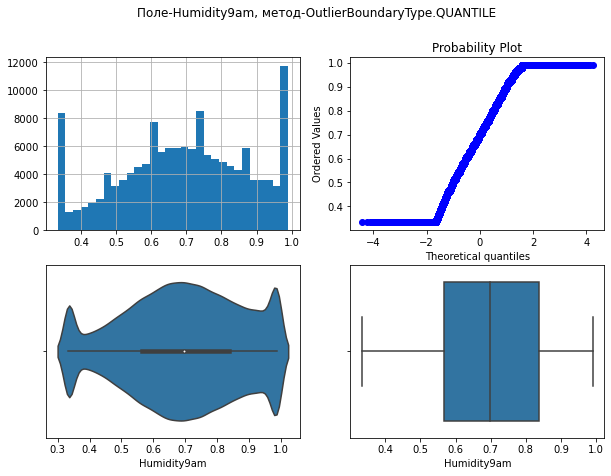

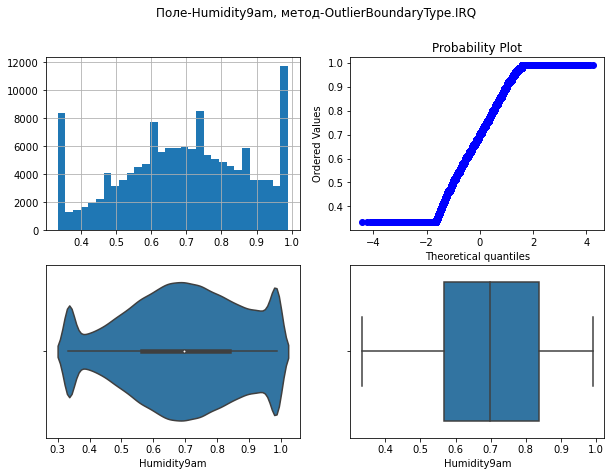

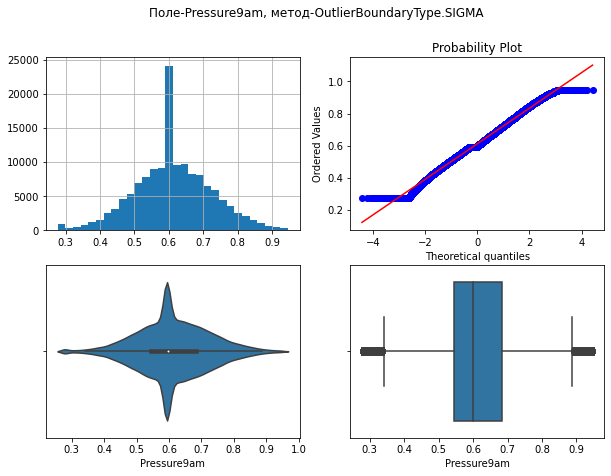

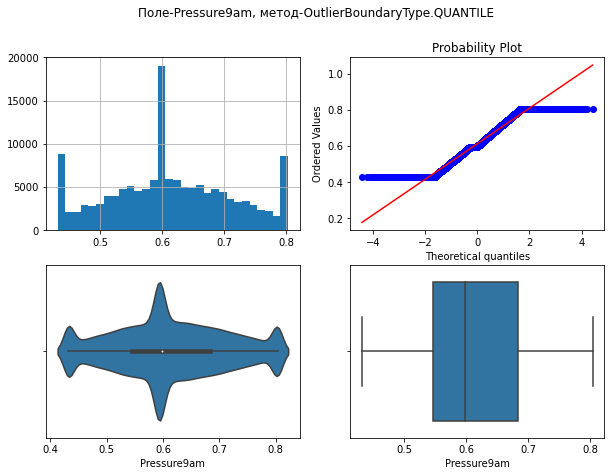

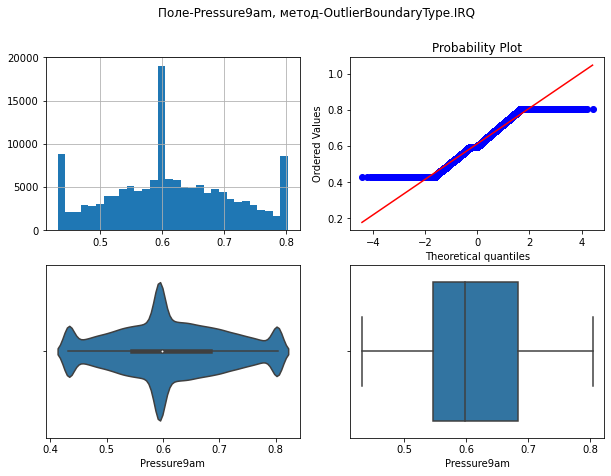

In [63]:
for col in col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots_out(data, col, title)

In [59]:
# DataFrame не содержащий целевой признак
# data_train = data.drop(['RISK_MM'], axis = 1)

y = data['RainTomorrow']
data_x = data.drop(['RainTomorrow'], axis = 1)

# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(data_x, y,
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = pd.DataFrame(X_train, columns=data.columns)
X_test_df = pd.DataFrame(X_test, columns=data.columns)

X_train_df.shape, X_test_df.shape

((113754, 22), (28439, 22))

In [69]:
# Удаление выбросов
for obt in OutlierBoundaryType:
    df1 = X_train_df.copy()    
    count = 0
    for col in col_list:
        lower_boundary, upper_boundary = get_outlier_boundaries(df1, col, obt)
        temp = np.where(df1[col] > upper_boundary, True, 
                            np.where(df1[col] < lower_boundary, True, False))
        if count==0:
            outliers = temp
        else:
            outliers = outliers + temp
        count += 1 
        
    data_train_trimmed = df1.loc[~(outliers), ]

In [72]:
# Замена выбросов
for obt in OutlierBoundaryType:
    
    df2 = X_train_df.copy()
    
    for col in col_list:    
        lower_boundary, upper_boundary = get_outlier_boundaries(df2, col, obt)
        df2[col] = np.where(df2[col] > upper_boundary, upper_boundary, 
                                 np.where(df2[col] < lower_boundary, lower_boundary, df2[col]))

    data_train_updated = df2

In [77]:
X_train_df.shape

(113754, 22)

In [75]:
data_train_trimmed.shape

(110595, 22)

In [74]:
data_train_updated.shape

(113754, 22)

## Отбор признаков

In [14]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

### filter method

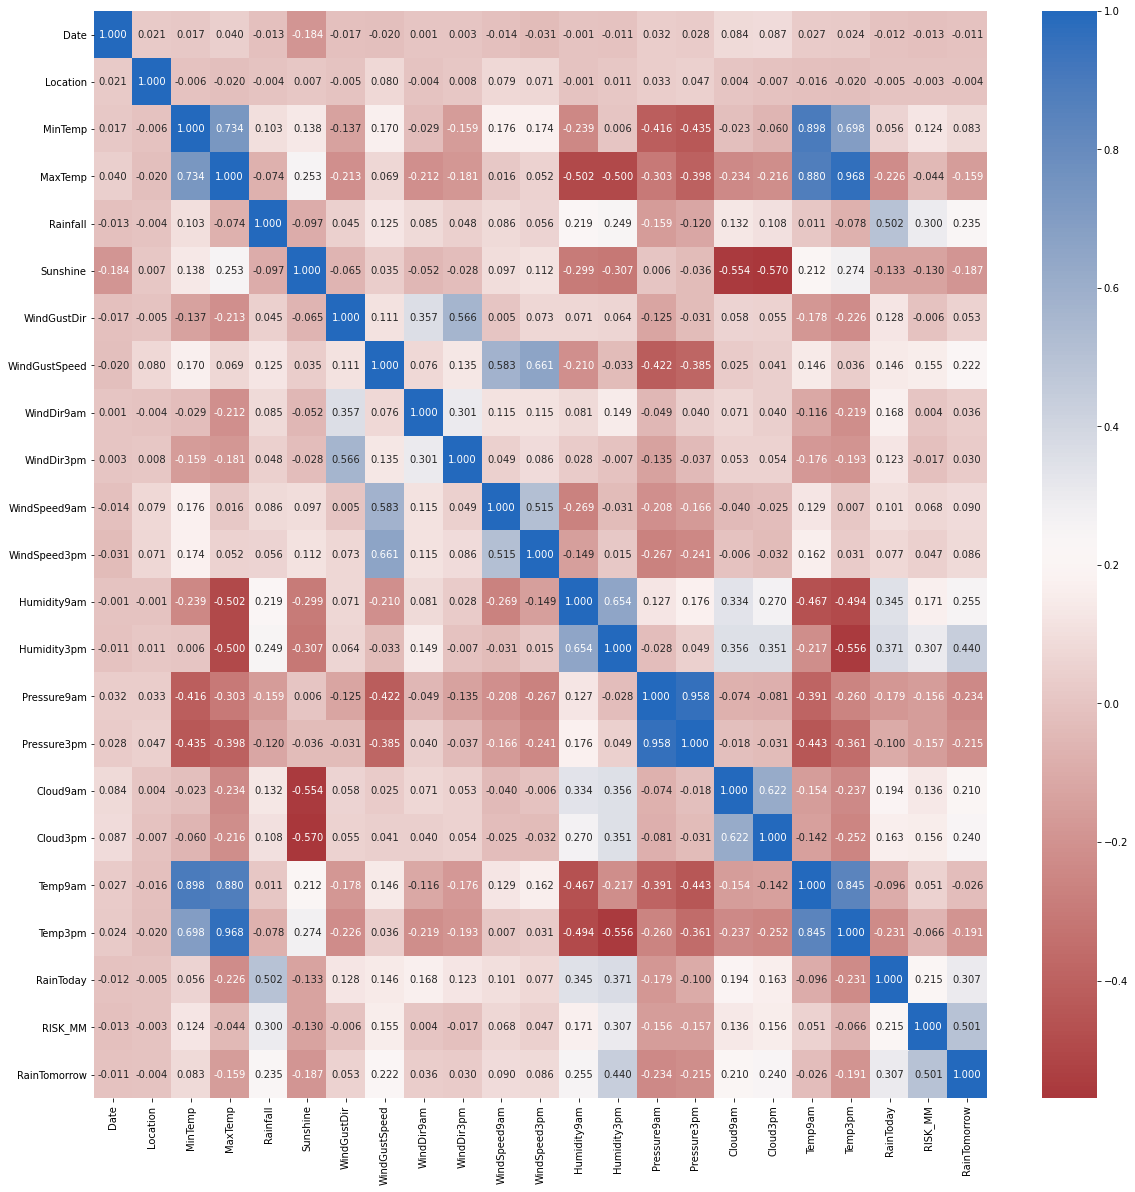

In [92]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

corrmat = data.corr()    
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, fmt='.3f', cmap="vlag_r")

Выделим группы сильно коррелирующих признаков (придётся оставить только по одному признаку из группы)

In [97]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [98]:
corr_groups(make_corr_df(data))

[['Temp3pm', 'Temp9am', 'MaxTemp'],
 ['Pressure3pm', 'Pressure9am'],
 ['Temp9am', 'MinTemp']]

In [15]:
data_y = data['RainTomorrow']
data_X = data.drop(['RainTomorrow'], axis = 1)

In [ ]:
data = data.drop(['MaxTemp'], axis = 1)
data = data.drop(['Temp9am'], axis = 1)
data = data.drop(['Pressure3pm'], axis = 1)

Рассмотрим метод, основанный на статистических характеристиках

Text(0, 0.5, 'Взаимная информация')

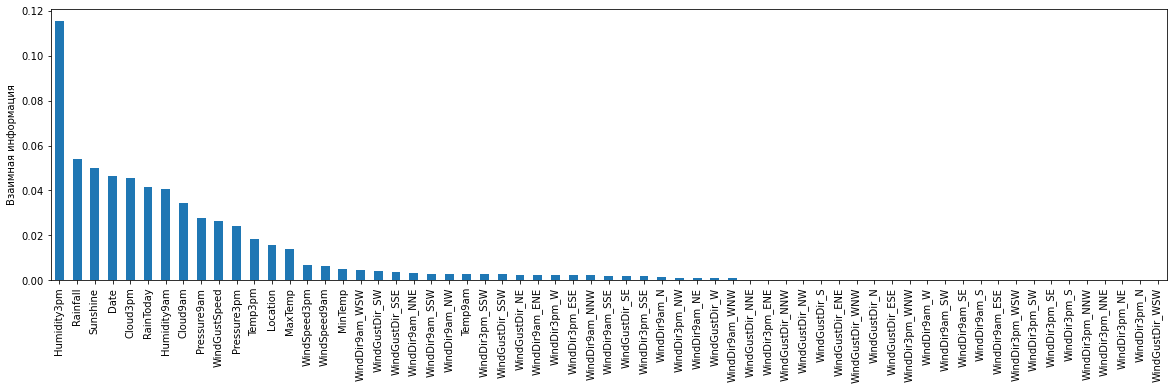

In [139]:
mi = mutual_info_regression(data_X, data_y)
mi = pd.Series(mi)
mi.index = data_X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,5))
plt.ylabel('Взаимная информация')

In [27]:
sel_mi = SelectKBest(mutual_info_regression, k=15).fit(data_X, data_y)

In [28]:
data_filter = data_X[ data_X.columns[ sel_mi.get_support() ] ]
data_filter

,Date,Location,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday
0,0.112372,0.041667,0.523629,0.001617,0.0,0.294574,0.153846,0.71,0.22,0.449587,0.4800,0.888889,0.777778,0.522073,0.0
1,0.112656,0.041667,0.565217,0.000000,0.0,0.294574,0.030769,0.44,0.25,0.497521,0.4912,0.777778,0.777778,0.570058,0.0
2,0.112940,0.041667,0.576560,0.000000,0.0,0.310078,0.146154,0.38,0.30,0.447934,0.5056,0.777778,0.222222,0.548944,0.0
3,0.113224,0.041667,0.620038,0.000000,0.0,0.139535,0.084615,0.45,0.16,0.613223,0.5712,0.777778,0.777778,0.612284,0.0
4,0.113507,0.041667,0.701323,0.002695,0.0,0.271318,0.053846,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.673704,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.998581,0.854167,0.502836,0.000000,0.0,0.193798,0.115385,0.59,0.27,0.730579,0.7056,0.777778,0.777778,0.504798,0.0
142189,0.998865,0.854167,0.533081,0.000000,0.0,0.193798,0.100000,0.51,0.24,0.728926,0.6912,0.777778,0.777778,0.533589,0.0
142190,0.999149,0.854167,0.568998,0.000000,0.0,0.124031,0.100000,0.56,0.21,0.710744,0.6720,0.777778,0.777778,0.573896,0.0
142191,0.999432,0.854167,0.599244,0.000000,0.0,0.240310,0.069231,0.53,0.24,0.669421,0.6352,0.777778,0.777778,0.604607,0.0


In [29]:
data = data_filter

### wrapper methods

In [20]:
f = ['Location','Sunshine','Humidity3pm', 'Rainfall','Pressure3pm']

In [21]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data_X[f], data_y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 25/25

Best accuracy score: 0.80
Best subset (indices): (1, 2, 3, 4)
Best subset (corresponding names): ('Sunshine', 'Humidity3pm', 'Rainfall', 'Pressure3pm')


In [23]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(data_X[f], data_y)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 15/15

Best accuracy score: 0.79
Best subset (indices): (2, 3)
Best subset (corresponding names): ('Humidity3pm', 'Rainfall')


### embedded methods

In [30]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    labels = [x for x,_ in sorted_list]
    data = [x for _,x in sorted_list]
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier()
rfc1.fit(data_X, data_y)

rfc1.feature_importances_, sum(rfc1.feature_importances_)

(array([0.04320436, 0.03220221, 0.04571939, 0.04367239, 0.05638106,
        0.04165753, 0.05174298, 0.02984923, 0.03235927, 0.05697392,
        0.15417893, 0.0520393 , 0.05720983, 0.02097681, 0.03143727,
        0.04214319, 0.0477941 , 0.02290208, 0.002475  , 0.00250836,
        0.00371666, 0.00307322, 0.00302294, 0.00354523, 0.00363331,
        0.00304484, 0.00357458, 0.00278262, 0.00266085, 0.00264402,
        0.0033277 , 0.00355065, 0.0028926 , 0.00253051, 0.0021238 ,
        0.00514911, 0.00294493, 0.00365726, 0.00345479, 0.0035056 ,
        0.00272323, 0.00254388, 0.00255291, 0.00282769, 0.00293154,
        0.00328644, 0.00303503, 0.00287954, 0.0022409 , 0.0021827 ,
        0.0035386 , 0.00274261, 0.00281811, 0.00306787, 0.00340139,
        0.00313234, 0.00275369, 0.00273714, 0.00287839, 0.00296505,
        0.00436388, 0.00325074, 0.00288393]),
 1.0)

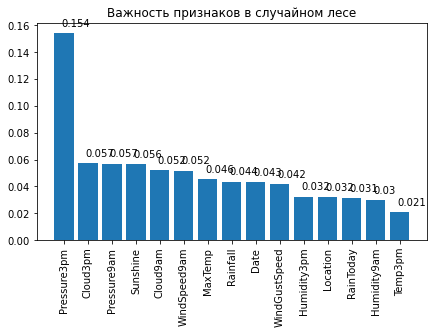

In [32]:
_,_=draw_feature_importances(rfc1, data, 'Важность признаков в случайном лесе')

In [36]:
filter_index = data_X.columns[ SelectFromModel(rfc1, threshold='0.1*mean').fit(data_X, data_y).get_support() ]

In [38]:
data_filter = data_X[filter_index]
data_filter

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,0.112372,0.041667,0.516509,0.523629,0.001617,0.0,0.294574,0.153846,0.275862,0.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.112656,0.041667,0.375000,0.565217,0.000000,0.0,0.294574,0.030769,0.252874,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.112940,0.041667,0.504717,0.576560,0.000000,0.0,0.310078,0.146154,0.298851,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.113224,0.041667,0.417453,0.620038,0.000000,0.0,0.139535,0.084615,0.103448,0.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.113507,0.041667,0.613208,0.701323,0.002695,0.0,0.271318,0.053846,0.229885,0.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.998581,0.854167,0.283019,0.502836,0.000000,0.0,0.193798,0.115385,0.149425,0.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142189,0.998865,0.854167,0.266509,0.533081,0.000000,0.0,0.193798,0.100000,0.126437,0.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142190,0.999149,0.854167,0.285377,0.568998,0.000000,0.0,0.124031,0.100000,0.103448,0.56,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142191,0.999432,0.854167,0.327830,0.599244,0.000000,0.0,0.240310,0.069231,0.103448,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
